## Machine Learning Approach

In [1]:
import numpy as np
import pandas as pd

path = "../input/dataset-umap20-er/dataset_umap20_ER/"

In [2]:
val_df = pd.read_csv(path+'data/ds.tsv', sep='\t')
ts_hs = pd.read_csv(path+'data/ts_hs.tsv', sep='\t')
ts_ht = pd.read_csv(path+"data/ts_ht.tsv", sep='\t') 

In [3]:
ts_hs.head()

,raw_text,pp_text,polarity_score,sadness_score,wc,label
0,You're huge .,you re huge,0.4000,0.0000,3,0
1,It's not baffling whatsoever. Look at the shap...,it s not baffling whatsoever look at the shape...,0.0000,0.0000,24,0
2,I would update/re-install your**[ drivers](htt...,i would update re install your *[ drivers if y...,0.0875,0.3735,206,0
3,Father Saves Daughter From Alleged Predator Sh...,father saves daughter from alleged predator sh...,-0.1000,0.0000,11,0
4,My mom always does this thing now that I am an...,my mom always does this thing now that i am an...,-0.1417,0.5718,88,1


In [4]:
ts_ht.head()

,raw_text,pp_text,polarity_score,sadness_score,wc,label
0,The US Government fiscal year is 01 October to...,the us government fiscal year is to the tax ye...,-0.125,0.142,26,0
1,They call medicine that has worked for thousan...,they call medicine that has worked for thousan...,0.000,0.000,17,0
2,"It's okay, I didn't feel like talking to someo...",it s okay i didn t feel like talking to someon...,0.500,0.000,14,1
3,When she remembers things I say and takes an i...,when she remembers things i say and takes an i...,0.700,0.000,27,1
4,Designer's Guide to DPI,designer s guide to dpi,0.000,0.000,5,0


In [5]:
val_df.head()

,raw_text,pp_text,polarity_score,sadness_score,wc,label
0,I've been on the medication about a month. I m...,i ve been on the medication about a month i me...,0.0026,0.0000,97,1
1,"Dosage (Adrafinil) Okay, it's my first time ev...",dosage adrafinil okay it s my first time ever ...,0.3417,0.0000,58,1
2,"Its really weird, a year ago I couldn't even h...",its really weird a year ago i couldn t even ha...,0.0333,0.4220,44,1
3,My boyfriend wants to kill himself. He has bee...,my boyfriend wants to kill himself he has been...,0.0810,0.6630,972,1
4,How to fade old self harm scars? (tw) (TRIGGER...,how to fade old self harm scars ? tw trigger w...,0.0839,0.5485,187,1


In [6]:
print(ts_hs.info())
print(ts_ht.info())
print(val_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   raw_text        7000 non-null   object 
 1   pp_text         7000 non-null   object 
 2   polarity_score  7000 non-null   float64
 3   sadness_score   7000 non-null   float64
 4   wc              7000 non-null   int64  
 5   label           7000 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 328.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   raw_text        7000 non-null   object 
 1   pp_text         7000 non-null   object 
 2   polarity_score  7000 non-null   float64
 3   sadness_score   7000 non-null   float64
 4   wc              7000 non-null   int64  
 5   label           7000 non-null   int64  

In [7]:
data = pd.concat([ts_hs, ts_ht], ignore_index=True)
data.shape

(14000, 6)

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords= set(STOPWORDS)

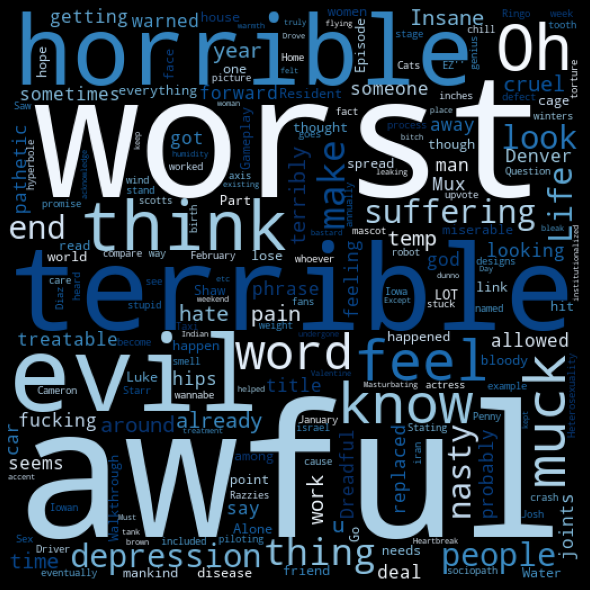

In [9]:
depressive_words = ' '.join(list(data[data['polarity_score'] == -1]['raw_text']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues", stopwords = stopwords).generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

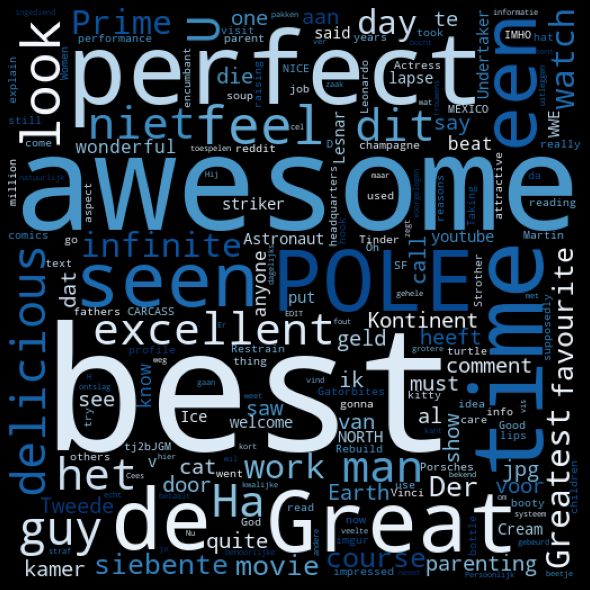

In [10]:
non_depressive_words = ' '.join(list(data[data['polarity_score'] == 1]['raw_text']))
non_depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues", stopwords = stopwords).generate(non_depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(non_depressive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
bag_of_words = count_vect.fit_transform(data['pp_text'])
bag_of_words.shape

(14000, 23765)

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
bow_tfidf = tfidf_transformer.fit_transform(bag_of_words)
bow_tfidf.shape

(14000, 23765)

In [13]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

In [14]:
results_df = pd.DataFrame(columns=['model', 'description', 'accuracy', 'f1_score', 'precision_score', 'recall'])

def evaluate_model(pred):
    
    
    ## Accuracy score
    acc = np.mean( pred == val_df['label'])
    print('Accuracy score: %.3f' % acc)
    
    ## Precision score
    precision = precision_score(val_df['label'], pred, average='binary')
    print('Precision: %.3f' % precision)
    
    ## Recall score
    recall = recall_score(val_df['label'], pred, average='binary')
    print('Recall: %.3f' % recall)

    ## F1-Score
    f1score = f1_score(val_df['label'], pred, average='binary')
    print('F1-Score: %.3f' % f1score)
    
    return acc, precision, recall, f1score


In [15]:
classifier = Pipeline([
                       ('vect', CountVectorizer(stop_words='english')),
                       ('tfidf', TfidfTransformer(smooth_idf=True,use_idf=True)),
                       ('clf', LGBMClassifier())
])

_ = classifier.fit(data['pp_text'], data['label'])
preds = classifier.predict(val_df['pp_text'])

result = evaluate_model(preds)
results_df = results_df.append({'model': 'LGBMClassifier', 'accuracy': result[0], 'f1_score': result[3], 'precision_score': result[1], 'recall': result[2],
              'description':"count vectorizer, Tfidf, lgbm"}, ignore_index=True)

Accuracy score: 0.845
Precision: 0.750
Recall: 0.873
F1-Score: 0.807


In [16]:
classifier = Pipeline([
                       ('vect', CountVectorizer(stop_words='english')),
                       ('tfidf', TfidfTransformer(smooth_idf=True,use_idf=True)),
                       ('clf', LogisticRegression())
])

_ = classifier.fit(data['pp_text'], data['label'])
preds = classifier.predict(val_df['pp_text'])

result = evaluate_model(preds)
results_df = results_df.append({'model': 'LogisticRegression', 'accuracy': result[0], 'f1_score': result[3], 'precision_score': result[1], 'recall': result[2],
              'description':"count vectorizer, Tfidf, logistic regression"}, ignore_index=True)

Accuracy score: 0.858
Precision: 0.766
Recall: 0.891
F1-Score: 0.824


In [17]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english', ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

In [19]:
classifier = Pipeline([
                      ('vect', stemmed_count_vect),
                      ('tfidf', TfidfTransformer()),
                      ('clf', LGBMClassifier())
])

classifier = classifier.fit(data['pp_text'], data['label'])
preds = classifier.predict(val_df['pp_text'])

result = evaluate_model(preds)
results_df = results_df.append({'model': 'LGBMClassifier', 'accuracy': result[0], 'f1_score': result[3], 'precision_score': result[1], 'recall': result[2],
              'description':"stemmed count vectorizer, Tfidf, lgbm"}, ignore_index=True)

Accuracy score: 0.872
Precision: 0.781
Recall: 0.909
F1-Score: 0.840


In [20]:
classifier = Pipeline([
                      ('vect', stemmed_count_vect),
                      ('tfidf', TfidfTransformer()),
                      ('clf', LogisticRegression())
])

classifier = classifier.fit(data['pp_text'], data['label'])
preds = classifier.predict(val_df['pp_text'])

result = evaluate_model(preds)
results_df = results_df.append({'model': 'LogisticRegression', 'accuracy': result[0], 'f1_score': result[3], 'precision_score': result[1], 'recall': result[2],
              'description':"stemmed count vectorizer, Tfidf, logistic regression"}, ignore_index=True)

Accuracy score: 0.878
Precision: 0.803
Recall: 0.891
F1-Score: 0.845


In [21]:
results_df

,model,description,accuracy,f1_score,precision_score,recall
0,LGBMClassifier,"count vectorizer, Tfidf, lgbm",0.844595,0.806723,0.750000,0.872727
1,LogisticRegression,"count vectorizer, Tfidf, logistic regression",0.858108,0.823529,0.765625,0.890909
2,LGBMClassifier,"stemmed count vectorizer, Tfidf, lgbm",0.871622,0.840336,0.781250,0.909091
3,LogisticRegression,"stemmed count vectorizer, Tfidf, logistic regr...",0.878378,0.844828,0.803279,0.890909
